<a href="https://colab.research.google.com/github/pranav-kaushal/Time-Series-Forecasting/blob/main/Time_Series_Forecasting_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting:
Time series forecasting occurs when you make scientific predictions based on historical time stamped data. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.

Predictions are made for new data when the actual outcome may not be known until some future date. The future is being predicted, but all prior observations are almost always treated equally.time series forecasting uses the information in a time series (perhaps with additional information) to forecast future values of that series.

Making predictions about the future is called extrapolation in the classical statistical handling of time series data.More modern fields focus on the topic and refer to it as time series forecasting.

Forecasting involves taking models fit on historical data and using them to predict future observations.


# Components of Time Series


1. Irregularity. one time occurrence and then subsides, erratic in nature
2. Trend. The optional and often linear increasing or decreasing behavior of    the series over time.
3. Seasonality. The optional repeating patterns or cycles of behavior over time.
4. Noise. The optional variability in the observations that cannot be explained by the model.
5. Level. The baseline value for the series if it were a straight line.

Time series data often requires cleaning, scaling, and even transformation.

For example:

  Frequency. Perhaps data is provided at a frequency that is too high to model or is unevenly spaced through time requiring resampling for use in some models.
  Outliers. Perhaps there are corrupt or extreme outlier values that need to be identified and handled.
  Missing. Perhaps there are gaps or missing data that need to be interpolated or imputed.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [69]:
# Lets import the dataset from kaggle onto local machine and then try to annalyze it
my_data = pd.read_csv('/content/sample_data/AirPassengers.csv', parse_dates=True)
my_data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [70]:
# Parse strings from Month column into date time format using pandas to_datetime function
my_data['Month'] = pd.to_datetime(my_data['Month'],infer_datetime_format=True)
#my_data['Month'] = my_data['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
my_data = my_data.set_index('Month')
my_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


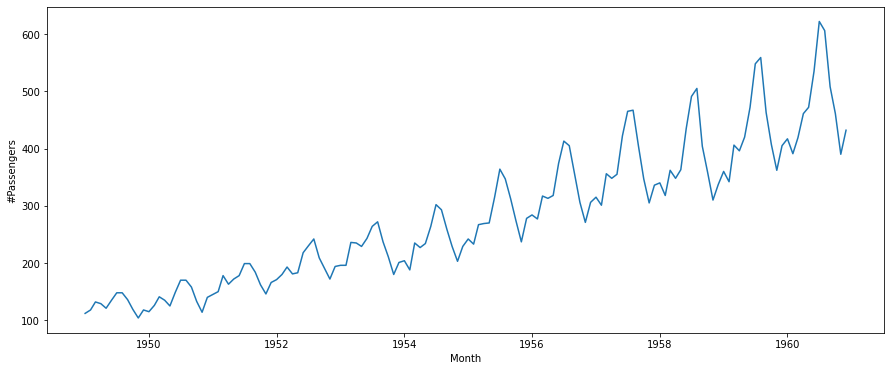

In [93]:
# LETS PLOT to see if its trending and seasonality
import matplotlib.pyplot as plt
import matplotlib
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.plot(my_data)

In [103]:
# This data is not stationary as its trending upwards and mean is not stationary or same throughout.
# Check for rolling statistics

rolling_mean = my_data.rolling(window=12).mean() # using mean function and calculating over a window of 12 months rolling
rolling_std = my_data.rolling(window=12).std()
print(rolling_mean, rolling_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


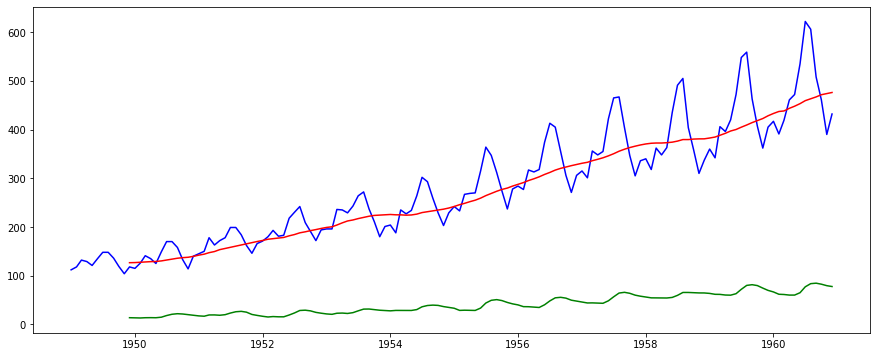

In [106]:
# plot original and the std and mean on top of it
orig = plt.plot(my_data, color = 'blue', label = 'Original')
mean = plt.plot(rolling_mean, color = 'red', label = 'mean')
std = plt.plot(rolling_std, color = 'green', label = 'std')

# Perform Dickey-Fuller test using stats model TSH to check if data is stationary
 we need to check if the p-valus is less than 0.5 H0 ie; if p-value is more than 0.5 then we reject Null hypothesis.
 null hpothesis says p-value should be less than 0.5 for the data to be stationary, in this case we can not reject H0 and hence data is Not Stationary
 critical val should be more than test statistic

In [120]:
from statsmodels.tsa.stattools import adfuller

print("Test Results")
dftest = adfuller(my_data['#Passengers'], autolag= 'AIC') # we pass the data column whith passenger list for analysis
df_output = pd.Series(dftest[0:4], index= ['Test statistics', 'p-value', 'Lags Used', 'No. of observations used'])
for key,value in dftest[4].items():
  df_output['Critical Value (%s)' %key] = value

print(df_output)

Test Results
Test statistics               0.815369
p-value                       0.991880
Lags Used                    13.000000
No. of observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


## Estimate Trend

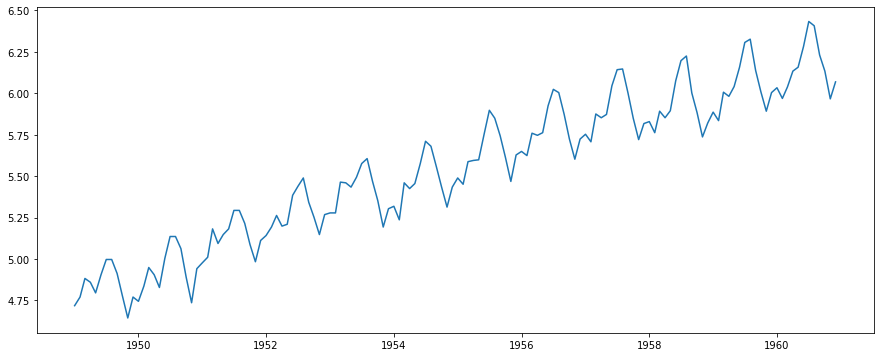

In [123]:
# We reduce the scale using log method and replot it 
my_data_logscale = np.log(my_data)
plt.plot(my_data_logscale)

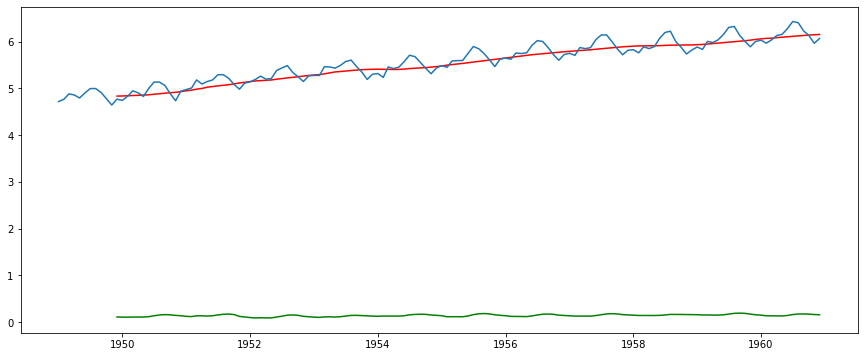

In [131]:
# Lets take the Moving Average (Mean) with same window size in Log time series

moving_avg = my_data_logscale.rolling(window=12).mean()
moving_std = my_data_logscale.rolling(window=12).std()
plt.plot(moving_avg, color = 'red')
plt.plot(moving_std, color = 'green')
plt.plot(my_data_logscale)